In [3]:
# import all the necessary libraries
import os
import pandas as pd
import json

In [4]:
# Get all the '.json' files in the directory 'data'
data_folder = os.path.join('data')
sub_folders = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, f))]
json_files = [os.path.join(sub_folder, f) for sub_folder in sub_folders for f in os.listdir(sub_folder) if f.endswith('.json')]

In [5]:
# Create a single dataframe from all the '.json' files
df_list = []
for json_file in json_files:
    with open(json_file) as f:
        data = json.load(f)
        messages = data['messages']
        for message in messages:
            df_list.append([data['user_id'], data['guild_id'], data['channel_id'],
                            data['channel_name'], '. '.join(message['content'].split('\n')), 
                            message['id'], message['timestamp'].split('T')[0], 
                            message['timestamp'].split('T')[1].split("+")[0], 
                            True if len(message['attachments']) > 0 else False, 
                            True if 'message_reference' in message else False])

df = pd.DataFrame(df_list, columns=['user_id', 'guild_id', 'channel_id', 'channel_name', 
                                'message_content', 'message_id', 'message_date', 'message_timestamp',
                                'is_attachment_present', 'is_reference'])

In [6]:
df.head()

,user_id,guild_id,channel_id,channel_name,message_content,message_id,message_date,message_timestamp,is_attachment_present,is_reference
0,user1,1015029498317651979,1015029498317651981,links-and-resources,Drive folder link:. https://drive.google.com/d...,1015037923625803786,2022-09-01,23:18:19.485000,False,False
1,user1,1015029498317651979,1015029498317651981,links-and-resources,,1015037982555770922,2022-09-01,23:18:33.535000,False,True
2,user1,1015029498317651979,1015029498317651981,links-and-resources,https://docs.google.com/document/d/1UxK9K7_ATn...,1015038876332605482,2022-09-01,23:22:06.628000,False,True
3,user1,1015029498317651979,1015029498317651981,links-and-resources,Hi Folks - here is some interesting research ...,1015059518503268392,2022-09-02,00:44:08.105000,True,False
4,user1,1015029498317651979,1015029498317651981,links-and-resources,https://devpost.com/software/discord-chats-ana...,1017566196104712243,2022-09-08,22:44:46.617000,False,False


In [7]:
len(df.index)

520

In [7]:
!pip install -U spacy
!python -m spacy download en_core_web_sm


  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: wasabi
    Found existing installation: wasabi 0.9.0
    Uninstalling wasabi-0.9.0:
      Successfully uninstalled wasabi-0.9.0
  Attempting uninstall: blis
    Found existing installation: blis 0.7.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.2.0 requires spacy<3.3.0,>=3.2.0, but you have spacy 3.4.3 which is incompatible.



    Uninstalling blis-0.7.5:
      Successfully uninstalled blis-0.7.5
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.13
    Uninstalling thinc-8.0.13:
      Successfully uninstalled thinc-8.0.13
  Attempting uninstall: spacy-legacy
    Found existing installation: spacy-legacy 3.0.9
    Uninstalling spacy-legacy-3.0.9:
      Successfully uninstalled spacy-legacy-3.0.9
  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.2
    Uninstalling spacy-3.2.2:
      Successfully uninstalled spacy-3.2.2

2022-12-01 14:53:53.169632: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-01 14:53:53.170019: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-01 14:54:05.982083: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-12-01 14:54:05.982643: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-01 14:54:05.994360: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Akshays-PC
2022-12-01 14:54:05.994673: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Akshays-PC



  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.2.0
    Uninstalling en-core-web-sm-3.2.0:
      Successfully uninstalled en-core-web-sm-3.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
!pip install pandas-profiling

## Summary statistics

In [8]:
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns

In [9]:
df.describe().T

,count,unique,top,freq
user_id,520,1,user1,520
guild_id,520,1,1015029498317651979,520
channel_id,520,8,1015029498317651982,375
channel_name,520,8,board,375
message_content,520,494,,14
message_id,520,520,1015037923625803786,1
message_date,520,50,2022-09-28,41
message_timestamp,520,520,23:18:19.485000,1
is_attachment_present,520,2,False,511
is_reference,520,2,False,433


### Distribution of users:

<AxesSubplot:>

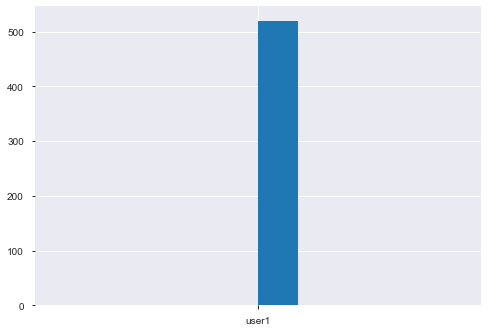

In [10]:
df['user_id'].hist()

## Distribution of channels

<AxesSubplot:xlabel='channel_id', ylabel='Count'>

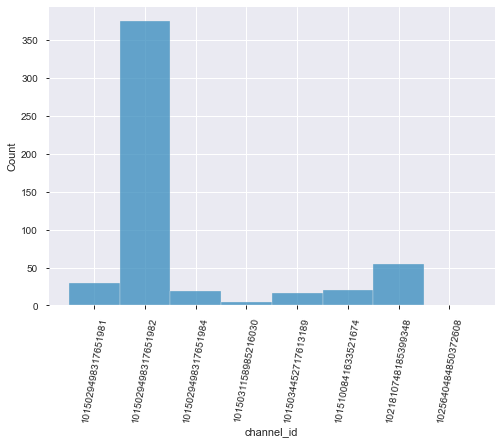

In [11]:
channel_hist = sns.histplot(df['channel_id'])
for item in channel_hist.get_xticklabels():
    item.set_rotation(80)
channel_hist

## NLP

In [12]:
# NLP preprocessing
import spacy
import nltk
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.feature_extraction import text
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
messages = np.array(df["message_content"])
# Use tfidf vectorizer to get the frequent stopwords of the whole corpus
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(messages)
custom_stop_words = text.ENGLISH_STOP_WORDS.union(["https"])


In [14]:
# Tokenize the messages with NLTK's TweetTokenizer
cleaned_messages = []

for message in messages:
    cleaned = [word for word in word_tokenize(message.lower()) if 
               (word not in custom_stop_words) and (len(word.strip()) > 2)]
    cleaned = re.sub(r'^https?:\/\/.*[\r\n]*', '', " ".join(cleaned), flags=re.MULTILINE) # Remove links
    cleaned = re.sub(r'[^\w\s]','',cleaned)
    cleaned_messages.append(cleaned)

cleaned_messages[:5]

['drive folder link drivegooglecomdrivefolders1dvmog1igqjjrqovtajwlnfbtgpd8u5lc uspsharing',
 '',
 'docsgooglecomdocumentd1uxk9k7_atnzvrga56pna76lnc_hthouiahv2t3rn9ywedit',
 'folks interesting research focusing visualizing data discord',
 'devpostcomsoftwarediscordchatsanalysis']

In [15]:
simple_counter = Counter()
noun_counter = Counter()
adj_counter = Counter()
verb_counter = Counter()
punc_counter = Counter()

for message in tqdm(cleaned_messages):
    for token in nlp(message.lower()):
        simple_counter[token.text] += 1
        if token.pos_ == "ADJ":
            adj_counter[token.text] += 1
        elif token.pos_ == "NOUN":
            noun_counter[token.text] += 1
        elif token.pos_ == "VERB":
            verb_counter[token.text] += 1
        elif token.pos_ == "PUNCT":
            punc_counter[token.text] += 1

100%|███████████████████████████████████████████████████████████████████████████████| 520/520 [00:03<00:00, 143.88it/s]


In [16]:
def common_words(counter, num):
    for token, count in counter.most_common(num):
        print(token, ":", count)
    
    plt.style.use('seaborn')
    top_tokens = [token for token, count in counter.most_common(num)]
    top_counts = [count for token, count in counter.most_common(num)]
    plt.bar(range(num), top_counts)
    plt.xticks(range(num), top_tokens, rotation=90)
    plt.xlabel('Token')
    plt.ylabel('Raw count')

## Most common words

meeting : 150
time : 59
presentation : 45
today : 43
discord : 42
client : 42
think : 40
tomorrow : 34
thanks : 33
available : 33
just : 30
join : 29
let : 28
guys : 28
cloud : 27
adam : 26
uspsharing : 24
midterm : 24
sorry : 24
team : 23


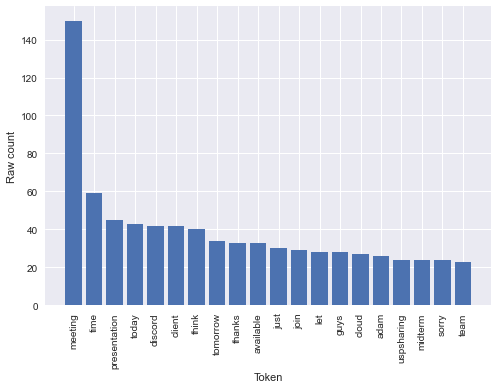

In [17]:
common_words(simple_counter, 20)

## Most common adjectives

available : 33
able : 20
internal : 19
sorry : 17
free : 17
sure : 14
good : 13
possible : 11
sdtrue : 11
final : 10
fine : 9
new : 8
quick : 8
late : 8
present : 8
critical : 7
important : 7
different : 6
cool : 6
similar : 6


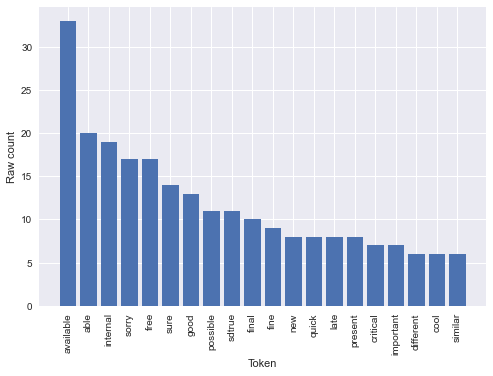

In [18]:
common_words(adj_counter, 20)

## 

## Word cloud

In [1]:
!pip install wordcloud

In [32]:
from wordcloud import WordCloud

In [20]:
# Check for the presence of null values
df['message_content'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
515    False
516    False
517    False
518    False
519    False
Name: message_content, Length: 520, dtype: bool>

In [35]:
# Lemmatize the words
lemmatized = []
for message in tqdm(cleaned_messages):
    processed = nlp(message)
    sentence = ""
    for word in processed:
        sentence += word.lemma_
        sentence += " "
    lemmatized.append(sentence)

lemmatized_text = ' '.join(lemmatized)
lemmatized_text[:100]

100%|███████████████████████████████████████████████████████████████████████████████| 520/520 [00:03<00:00, 160.28it/s]


'drive folder link drivegooglecomdrivefolders1dvmog1igqjjrqovtajwlnfbtgpd8u5lc uspsharing   docsgoogl'

In [69]:
# Generate the word cloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(lemmatized_text)

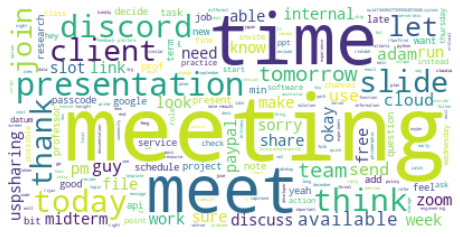

In [70]:
# Plot word cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...


True

In [40]:
df['lemmatized'] = lemmatized
df['lemmatized'].head()

0    drive folder link drivegooglecomdrivefolders1d...
1                                                     
2    docsgooglecomdocumentd1uxk9k7_atnzvrga56pna76l...
3    folk interesting research focus visualize data...
4              devpostcomsoftwarediscordchatsanalysis 
Name: lemmatized, dtype: object

In [42]:
sia = SentimentIntensityAnalyzer()

def getSentimentScore(row):
    return sia.polarity_scores(row["lemmatized"])["compound"]

df["vader_pred_sentiment_raw"] = df.apply(lambda x: getSentimentScore(x), axis=1)
df["vader_pred_sentiment"] = pd.cut(df["vader_pred_sentiment_raw"], bins=np.linspace(-1, 1, 6), labels=[1,2,3,4,5])

In [44]:
counter_list = []

for i in range(5):
    target = df[df["vader_pred_sentiment"] == (i+1)]
    counter = Counter()
    for messages in target["lemmatized"]:
        for message in word_tokenize(messages):
            counter[message] += 1
    counter_list.append(counter)

## Sentimenent ratings

### Rating = 1

discord : 20
service : 13
term : 8
api : 7
use : 6
data : 6
developer : 5
policy : 4
share : 3
scrape : 3


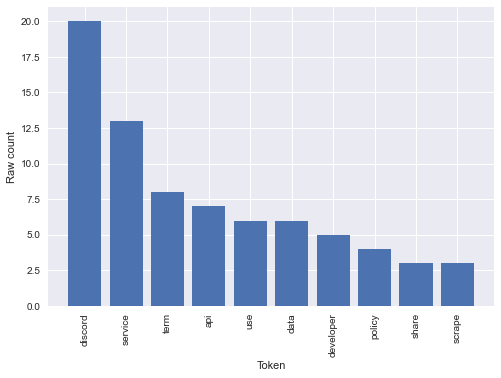

In [46]:
common_words(counter_list[0], 10)

### Rating = 2

meeting : 10
team : 7
think : 7
know : 7
let : 6
discord : 5
sorry : 5
time : 5
use : 4
critical : 4


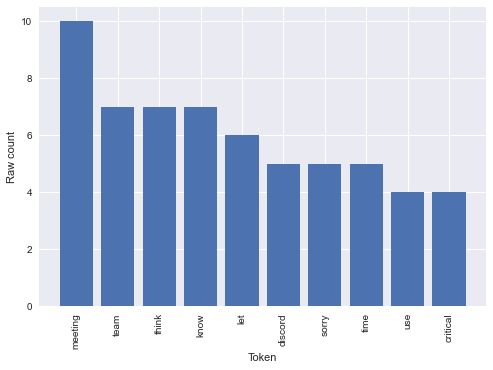

In [47]:
common_words(counter_list[1], 10)

meeting : 42
presentation : 24
available : 24
time : 24
today : 23
meet : 22
slide : 18
pm : 17
think : 16
adam : 15


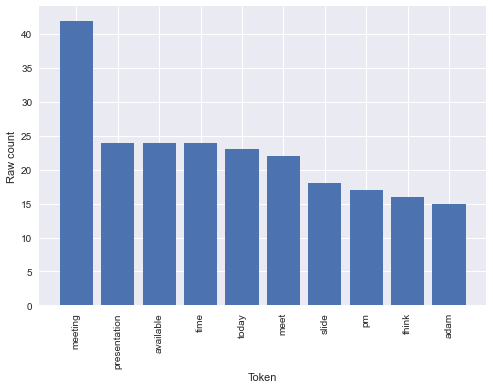

In [48]:
common_words(counter_list[2], 10)

meeting : 31
thank : 29
cloud : 24
join : 20
time : 17
slide : 15
presentation : 15
let : 13
client : 13
meet : 13


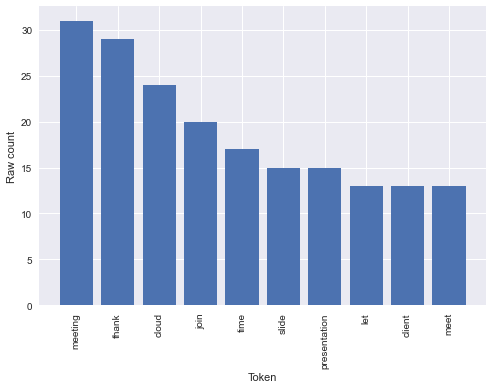

In [49]:
common_words(counter_list[3], 10)

meeting : 33
time : 18
meet : 14
client : 13
join : 12
good : 11
2022 : 11
thank : 10
new : 10
make : 9


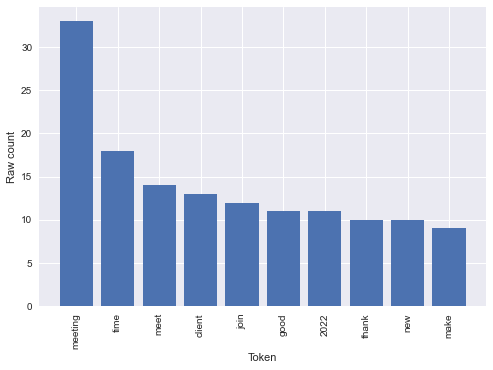

In [50]:
common_words(counter_list[4], 10)

# Sentence level sentiments

In [52]:
def getVadarPolarity(message):
    return sia.polarity_scores(message)['compound']

In [54]:
# Source: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4 
predicted_vadar = []
for l in lemmatized: # Using the lemmatized tweets
    predicted_vadar.append(getVadarPolarity(l)) 

# Cut dataset into 5 bins for sentiment score assignment
df['predicted_vadar'] = pd.cut(predicted_vadar, bins=5, labels=[1, 2, 3, 4, 5]) 

In [84]:
df[df['predicted_vadar'] < 2]

,user_id,guild_id,channel_id,channel_name,message_content,message_id,message_date,message_timestamp,is_attachment_present,is_reference,lemmatized,vader_pred_sentiment_raw,vader_pred_sentiment,predicted_vadar
12,user1,1015029498317651979,1015029498317651981,links-and-resources,Below page guides us how to set up environment...,1017928919300722792,2022-09-09,22:46:06.566000,False,False,page guide set environment variable bot token ...,-0.7269,1,1
24,user1,1015029498317651979,1015029498317651981,links-and-resources,Discord's Terms of Service. https://discord.co...,1024818692720181309,2022-09-28,23:03:36.555000,False,False,discord term service discordcomterm discord co...,-0.8689,1,1
188,user1,1015029498317651979,1015029498317651982,board,Here are some important clauses I found from t...,1024831729288106036,2022-09-28,23:55:24.715000,False,False,important clause official documentation share ...,-0.8402,1,1
227,user1,1015029498317651979,1015029498317651982,board,Oh I was mistaken I got the wrong date 10/19 s...,1027625191565697116,2022-10-06,16:55:38.022000,False,False,mistaken get wrong date 1019 fine sorry,-0.6249,1,1
269,user1,1015029498317651979,1015029498317651982,board,Discord API slide touches upon Discord policy,1031740042860834876,2022-10-18,01:26:35.021000,False,True,discord api slide touch discord policy,-0.6597,1,1
336,user1,1015029498317651979,1015029498317651982,board,I think it will forcibly be stopped after the ...,1036108923784151042,2022-10-30,02:46:57.403000,False,False,think forcibly stop time max hour timeout occu...,-0.5994,2,1
428,user1,1015029498317651979,1015034452717613189,meeting-notes,Sep 1 meeting with Ari. Here is a list of acti...,1015034619663499315,2022-09-01,23:05:11.759000,False,False,sep meet ari list action item discuss today se...,-0.7964,1,1
